# Data visualization
Em 2017  a indústria de games faturou mais que a indústria de música e a indústria de filmes (mídia física) juntos! É um fato que esse nicho do entretenimento conquista cada vez mais pessoas ano após ano. No Brasil mais de 66% disseram que consomem entretenimento do nicho de games.

Anexa você irá encontrar uma base de dados sobre o ranking de vídeo games nos últimos anos e com esse dataset você deverá apresentar as seguintes visualizações:

Obs: Os valores de venda estão em milhões de dólares

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font_scale=1)

A) Histogramas de quantos jogos cada gênero possui nos primeiros 150 títulos do rank

In [2]:
df = pd.read_csv('dataset_video_games.csv')#, dtype={'Genre': 'category',
                                          #          'Publisher': 'category',
                                          #          'Platform': 'category',
                                          #          'Year': int,
                                          #          'Name': str})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
df_ranked = df.sort_values(by='Rank').set_index('Rank')

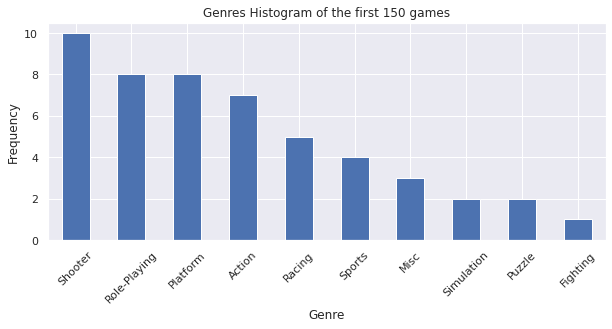

In [13]:
df_ranked.iloc[:50].groupby('Genre').count()['Name'].sort_values(ascending=False).plot(kind='bar',
                                                                                       figsize=(10, 4),
                                                                                       rot=45,
                                                                                       ylabel='Frequency',
                                                                                       title='Genres Histogram of the first 150 games');

B) Um gráfico de dispersão entre o ano da publicação e o total de vendas da Nintendo nos últimos 10 anos

In [15]:
# Ensuring that there are no different sectors of the same publisher, such as sony.
df_ranked[
    df_ranked['Publisher'].str.lower().str.contains('nintendo', regex=False, na=False)
].nunique() == df_ranked[
    df_ranked['Publisher'] == 'Nintendo'
].nunique() 

Name            True
Platform        True
Year            True
Genre           True
Publisher       True
NA_Sales        True
EU_Sales        True
JP_Sales        True
Other_Sales     True
Global_Sales    True
dtype: bool

In [16]:
n = 10
last_n_years = df_ranked['Year'].max() - n

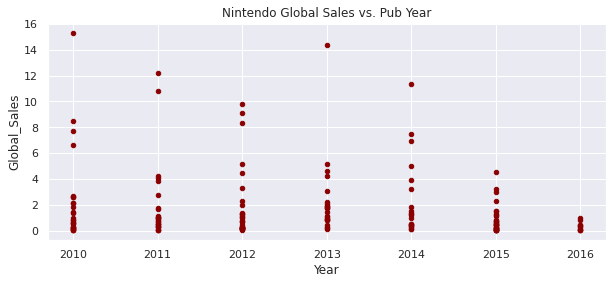

In [39]:
df_ranked[
    (df_ranked['Publisher'] == 'Nintendo') &
    (df_ranked['Year'] >= last_n_years)
][['Year', 'Global_Sales']].plot.scatter(x='Year',
                                         y='Global_Sales',
                                         title='Nintendo Global Sales vs. Pub Year',
                                         figsize=(10,4),
                                         color='darkred');

C) As 5 maiores “publishers” em vendas nos Estados Unidos

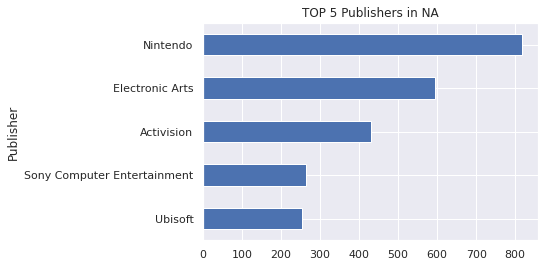

In [42]:
# NA = North America
# EU = Europe
# JP = Japan
df_ranked.groupby('Publisher').sum()['NA_Sales'].sort_values(ascending=False)[:5].sort_values().plot(kind='barh',
                                                                                                     title='TOP 5 Publishers in NA');